In [1]:

import pandas as pd #dados
import numpy as np #manipulacao de vetores
import seaborn as sns #plotagem
import pickle
import scipy.stats as stats #usado para normalizar os dados

from matplotlib import pyplot as plt #plotar os gráficos
from sklearn.cluster import KMeans #ML 

# leitura dos dados
df = pd.read_csv(r"C:\Users\Leandro\Dropbox\00-PD\teste\Respostas\Questao 04\dados_premium.csv")
df.head()
#print(df.shape)


,StudentId,DiasSemUso,TotalSessoes,TotalGasto
0,39981208,0,6,29.9
1,30437941,0,47,59.8
2,49298868,75,49,29.9
3,83170423,0,82,209.3
4,87293262,0,76,209.3


In [2]:
#normalização dos dados
numeric_cols=df[['DiasSemUso','TotalSessoes','TotalGasto']]
numeric_cols = numeric_cols.apply(stats.zscore)

#adicionar os dados normalizados ao DataFrame
df['R-Normalizado'] = numeric_cols['DiasSemUso'].values
df['F-Normalizado'] = numeric_cols['TotalSessoes'].values
df['M-Normalizado'] = numeric_cols['TotalGasto'].values

df.head()

,StudentId,DiasSemUso,TotalSessoes,TotalGasto,R-Normalizado,F-Normalizado,M-Normalizado
0,39981208,0,6,29.9,-0.604894,-0.655578,-0.899508
1,30437941,0,47,59.8,-0.604894,0.069737,-0.470769
2,49298868,75,49,29.9,0.729919,0.105118,-0.899508
3,83170423,0,82,209.3,-0.604894,0.688907,1.672928
4,87293262,0,76,209.3,-0.604894,0.582764,1.672928


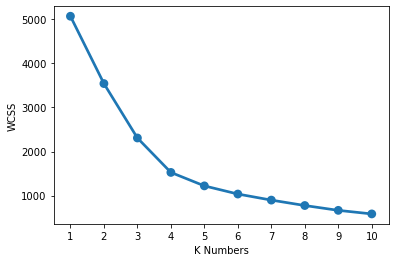

In [3]:
# Faz uma busca pelo  melhor valor de K
wcss = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters= k, init= 'k-means++', max_iter= 300)
    kmeans.fit(df[['R-Normalizado','F-Normalizado','M-Normalizado']])
    wcss[k] = kmeans.inertia_
    
# plotagem dos resultados
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('K Numbers')
plt.ylabel('WCSS')
plt.show()

In [11]:
# Executa a clusterização a partir do melhor valor de K
clus = KMeans(n_clusters= 8, init= 'k-means++', max_iter= 300)
clus.fit(df[['R-Normalizado','F-Normalizado','M-Normalizado']])

KMeans()

In [12]:
# Associo o label de cada cluster ao usuário no DataFrame
df['K_Cluster'] = clus.labels_
df.head()

,index,StudentId,DiasSemUso,TotalSessoes,TotalGasto,R-Normalizado,F-Normalizado,M-Normalizado,K_Cluster
0,0,39981208,0,6,29.9,-0.604894,-0.655578,-0.899508,1
1,1,30437941,0,47,59.8,-0.604894,0.069737,-0.470769,1
2,2,49298868,75,49,29.9,0.729919,0.105118,-0.899508,1
3,3,83170423,0,82,209.3,-0.604894,0.688907,1.672928,2
4,4,87293262,0,76,209.3,-0.604894,0.582764,1.672928,2


In [13]:
#agrupo os dados por cluster
df.groupby('K_Cluster').agg({
    'DiasSemUso':'mean',
    'TotalSessoes':'mean',
    'TotalGasto':['mean', 'count']}).round(2)

DiasSemUso TotalSessoes TotalGasto      
                mean         mean       mean count
K_Cluster                                         
0               7.28       139.88     200.33    64
1              11.47        30.55      38.53   709
2              12.76        32.80     205.42   271
3             157.74        18.76      50.98   175
4              19.63        32.56     114.23   293
5              10.30       512.90      66.97    10
6               6.96       138.26      54.16   105
7             177.68        12.67     190.32    63